# Importing the dependencies

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score


# Data Collection and Analysis


In [6]:
diabetis_data_set = pd.read_csv(r"E:\Data_Set\diabetes dataset.csv")

In [7]:
diabetis_data_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Number of rows as column
diabetis_data_set.shape

(768, 9)

In [11]:
# Getting the stastical measures of the diabetis dataset
diabetis_data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:

diabetis_data_set['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [16]:
# 0 -- Non_diabetic
# 1 -- diabetic

In [18]:
diabetis_data_set.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [19]:
# Separating the data and the labels
x = diabetis_data_set.drop(columns = 'Outcome', axis =1 )
y = diabetis_data_set['Outcome']

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Data standerdisation

In [25]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [26]:
standerdize_data = scaler.transform(x)

In [27]:
print(standerdize_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [28]:
x = standerdize_data
y = diabetis_data_set['Outcome']

In [29]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x, y, stratify = y, random_state = 2, test_size = 0.2)

In [30]:
print(x_train.shape,x.shape,x_test.shape)

(614, 8) (768, 8) (154, 8)


# Tranning the model


In [32]:
classifier = svm.SVC(kernel = 'linear')

In [33]:
# Tranning the support vector machine classifier
classifier.fit(x_train, y_train)

SVC(kernel='linear')

# Model Evaluation

In [36]:
# Accuracy score of the tranning data
x_train_prediction = classifier.predict(x_train)
tranning_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [43]:
print("tranning_data_accuracy_score: ",tranning_data_accuracy*100,"%")

tranning_data_accuracy_score:  78.66449511400651 %


In [44]:
# Accuracy score of the data
x_test_prediction = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [45]:
print("testing_data_accuracy_score: ", testing_data_accuracy * 100, "%")

testing_data_accuracy_score:  77.27272727272727 %


# Making a predictive system

In [63]:
input_data = (8,99,84,0,0,35.4,0.388,50)
# changing the input_data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [64]:
# Reshaping the input_data as we predicting for one instance
reshaped_input_data = input_data_as_numpy_array.reshape(1,-1)
reshaped_input_data

array([[ 8.   , 99.   , 84.   ,  0.   ,  0.   , 35.4  ,  0.388, 50.   ]])

In [65]:
# standerdize the input data
std_scaler = scaler.transform(reshaped_input_data)

E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [66]:
std_scaler

array([[ 1.23388019, -0.68523633,  0.77001375, -1.28821221, -0.69289057,
         0.43246741, -0.25331639,  1.4259954 ]])

In [67]:
prediction = classifier.predict(std_scaler)
print(prediction)

if prediction[0] == 0:
    print("The patient is non-diabetic")
else:
    print("The patient is diabetic")

[0]
The patient is non-diabetic


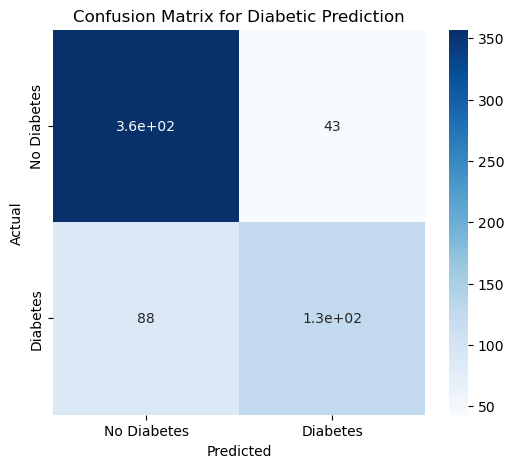

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_train, x_train_prediction)  # actual first, predicted second

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', 
            xticklabels=['No Diabetes', 'Diabetes'], 
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Diabetic Prediction")
plt.show()





In [73]:
classification_report_train = classification_report(x_train_prediction,y_train)
print(classification_report_train )

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       445
           1       0.59      0.75      0.66       169

    accuracy                           0.79       614
   macro avg       0.74      0.77      0.75       614
weighted avg       0.81      0.79      0.79       614



Text(45.722222222222214, 0.5, 'Actual')

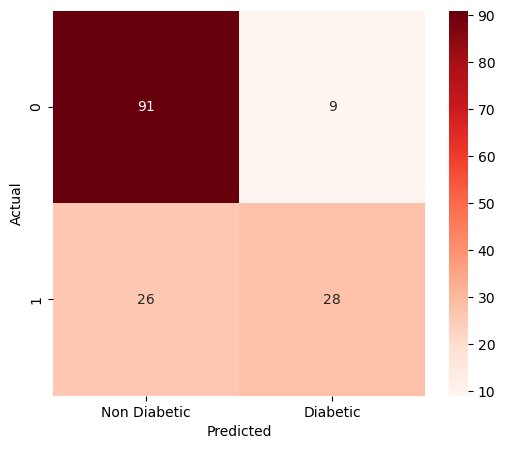

In [79]:
# Visualizing the accuracy of the data

cm2 = confusion_matrix( y_test, x_test_prediction)

# Plotting
plt.figure(figsize =(6,5))
sns.heatmap(cm2, annot = True, cmap= "Reds", xticklabels=['Non Diabetic','Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")